# Урок № 2
### [Картографические проекции](https://autogis-site.readthedocs.io/en/latest/notebooks/L2/02-projections.html)

**Координатные системы отсчета (CRS)** важны, поскольку геометрические фигуры в геодезическом каркасе-это просто набор координат в произвольном пространстве. CRS сообщает Python, как эти координаты связаны с местами на Земле. **Картографическая проекция** (или проекционная система координат) - это систематическое преобразование широты и долготы в плоскую поверхность, где единицы измерения довольно часто представлены в виде метров (вместо десятичных градусов). Это преобразование используется для представления трехмерной земли на плоской двумерной карте.

Поскольку CRS в разных пространственных наборах данных довольно часто различаются (например, у одного могут быть координаты, определенные в десятичных градусах, а у другого-в метрах), это обычная процедура перепроектирования (преобразования) различных слоев в общую CRS. Важно, чтобы слои находились в одной координатной системе отсчета при анализе пространственных отношений между слоями, например, при создании точки в полигональном запросе или другом типе анализа наложения.

Выбор подходящей проекции для вашей карты не всегда прост, потому что это зависит от того, что вы на самом деле хотите представить с помощью вашей карты, и каков пространственный масштаб ваших данных. На самом деле, нет ни одной “идеальной проекции”, так как каждая из них имеет свои сильные и слабые стороны, и вы должны выбрать проекцию, которая лучше всего соответствует вашим потребностям. На самом деле, проекция, которую вы выберете, может даже рассказать что-то о вас!

![](img/Map-projections.png)

Источник: XKCD, Смотрите полный комикс [о том,” что ваша любимая картографическая проекция говорит о вас"](https://xkcd.com/977/).

Для тех из вас, кто хочет немного более аналитического подхода к выбору проекции, вы можете получить хороший обзор от [georeference.org](http://www.georeference.org/doc/guide_to_selecting_map_projections.htm), или из этого сообщения в блоге, представляющего [сильные и слабые стороны нескольких широко используемых прогнозов.](http://usersguidetotheuniverse.com/index.php/2011/03/03/whats-the-best-map-projection/)



##### Система координат (CRS) в Geopandas

К счастью, определить и изменить проекции легко с помощью **Geopandas** и библиотеки под названием **pyproj**. В этом уроке мы увидим, как получить координируйте информацию о системе отсчета из этих данных и о том, как перепроектировать эти данные в другую crs. Мы перепроектируем файл данных из **WGS84** (координаты ``lat``, ``lon``) в азимутальную проекцию Ламберта равной площади, которая является рекомендуемой проекцией для Европа Европейской комиссией.

Для этого урока мы будем использовать Шейп-файл под названием Europe_borders.shprepresenting the country borders in Europe, который вы уже должны были загрузить во время предыдущего урока в L2_data папку.

В Шейп-файлах информация о системе координат хранится в файле .prj-file. Если этот файл отсутствует, у вас могут быть неприятности!. При считывании данных в GeoDataFrame с Geopandas CRS информация автоматически сохраняется в `.crs` атрибуте GeoDataFrame.

Давайте начнем с чтения данных из Europe_borders.shp файла и проверки crs:

In [1]:
import os
import geopandas as gpd
import numpy as np

# Корректное отображение графиков в jupyter
%matplotlib inline

In [2]:
# Текущая директория
ROOT_PATH = os.path.abspath(os.curdir)

# Папка с данными
fp = os.path.join(ROOT_PATH, r"L2_data\Europe_borders.shp")

# Чтение
data = gpd.read_file(fp)
data.head()

,TZID,geometry
0,Europe/Berlin,"POLYGON ((8.45778 54.56236, 8.44953 54.56269, ..."
1,Europe/Berlin,"POLYGON ((8.71992 47.69664, 8.72092 47.69530, ..."
2,Europe/Berlin,"POLYGON ((6.73317 53.57409, 6.73017 53.57542, ..."
3,Europe/Berlin,"POLYGON ((6.85822 53.59411, 6.85592 53.59550, ..."
4,Europe/Berlin,"POLYGON ((6.89894 53.62561, 6.88439 53.62814, ..."


In [3]:
# Проверьте данные системы координат
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

То, что мы видим здесь, на самом деле является объектом CRS из модуля pyproj.

Номер **EPSG** (названный в честь европейской группы нефтяных исследований) - это код, который сообщает о системе координат набора данных. "[Набор данных геодезических параметров EPSG](http://www.epsg.org/) представляет собой набор определений координатных систем отсчета и преобразований координат, которые могут быть глобальными, региональными, национальными или локальными в применении”.

Код **EPSG** нашего geodataframe `4326`- это код, который относится к системе координат **WGS84** (мы также можем выяснить это, посмотрев на значения координат, которые являются десятичными градусами долготы и широты).

Вы можете найти много информации и списков доступных систем координат из:

www.spatialreference.org

www.proj4.org

www.mapref.org

Давайте продолжим проверку значений в нашем geometry столбце -, чтобы убедиться, что CRS нашего GeoDataFrame кажется правильным:

In [4]:
data["geometry"]

0       POLYGON ((8.45778 54.56236, 8.44953 54.56269, ...
1       POLYGON ((8.71992 47.69664, 8.72092 47.69530, ...
2       POLYGON ((6.73317 53.57409, 6.73017 53.57542, ...
3       POLYGON ((6.85822 53.59411, 6.85592 53.59550, ...
4       POLYGON ((6.89894 53.62561, 6.88439 53.62814, ...
                              ...                        
3627    POLYGON ((18.75422 59.49353, 18.74311 59.49050...
3628    POLYGON ((18.84164 59.50605, 18.84028 59.50797...
3629    POLYGON ((18.59995 59.45653, 18.59431 59.45964...
3630    POLYGON ((30.00000 51.48947, 29.99511 51.48572...
3631    POLYGON ((-5.34392 36.11253, -5.34717 36.11528...
Name: geometry, Length: 3632, dtype: geometry

Как мы видим, значения координат полигонов действительно выглядят как значения широты и долготы, так что все вроде бы в порядке.

Проекция WGS84 на самом деле не очень хороша для представления европейских границ на карте (области искажаются), поэтому давайте преобразуем эти геометрии в проекцию Ламберта азимутальной равной площади [(EPSG: 3035)](http://spatialreference.org/ref/epsg/etrs89-etrs-laea/), которая является рекомендуемой проекцией Европейской комиссии.

Изменение проекции очень просто [сделать в Geopandas](http://geopandas.org/projections.html#re-projecting) с `.to_crs()` - function, которая является встроенной функцией GeoDataFrame. Функция имеет два альтернативных параметра 1) `crs` и 2) `epgs`, которые можно использовать для преобразования координат и повторного проецирования данных в CRS, который вы хотите использовать.

Давайте перепроектируем наши данные в EPSG 3035 используя epgs - параметр:

In [5]:
# делаем полную копию данных
data_WGS84 = data.copy()
data_WGS84

,TZID,geometry
0,Europe/Berlin,"POLYGON ((8.45778 54.56236, 8.44953 54.56269, ..."
1,Europe/Berlin,"POLYGON ((8.71992 47.69664, 8.72092 47.69530, ..."
2,Europe/Berlin,"POLYGON ((6.73317 53.57409, 6.73017 53.57542, ..."
3,Europe/Berlin,"POLYGON ((6.85822 53.59411, 6.85592 53.59550, ..."
4,Europe/Berlin,"POLYGON ((6.89894 53.62561, 6.88439 53.62814, ..."
...,...,...
3627,Europe/Stockholm,"POLYGON ((18.75422 59.49353, 18.74311 59.49050..."
3628,Europe/Stockholm,"POLYGON ((18.84164 59.50605, 18.84028 59.50797..."
3629,Europe/Stockholm,"POLYGON ((18.59995 59.45653, 18.59431 59.45964..."
3630,Europe/Minsk,"POLYGON ((30.00000 51.48947, 29.99511 51.48572..."


In [6]:
# Изменение проекции
data = data.to_crs(epsg=3035)
data

,TZID,geometry
0,Europe/Berlin,"POLYGON ((4221214.558 3496203.404, 4220681.651..."
1,Europe/Berlin,"POLYGON ((4224860.478 2732279.320, 4224932.819..."
2,Europe/Berlin,"POLYGON ((4104652.176 3390034.953, 4104460.401..."
3,Europe/Berlin,"POLYGON ((4113025.664 3391895.756, 4112879.943..."
4,Europe/Berlin,"POLYGON ((4115871.228 3395282.099, 4114921.348..."
...,...,...
3627,Europe/Stockholm,"POLYGON ((4816590.301 4074234.333, 4816008.390..."
3628,Europe/Stockholm,"POLYGON ((4821327.245 4076229.945, 4821222.901..."
3629,Europe/Stockholm,"POLYGON ((4808429.473 4069082.454, 4808067.721..."
3630,Europe/Minsk,"POLYGON ((5690071.718 3342608.395, 5689859.929..."


##### Визуализация 

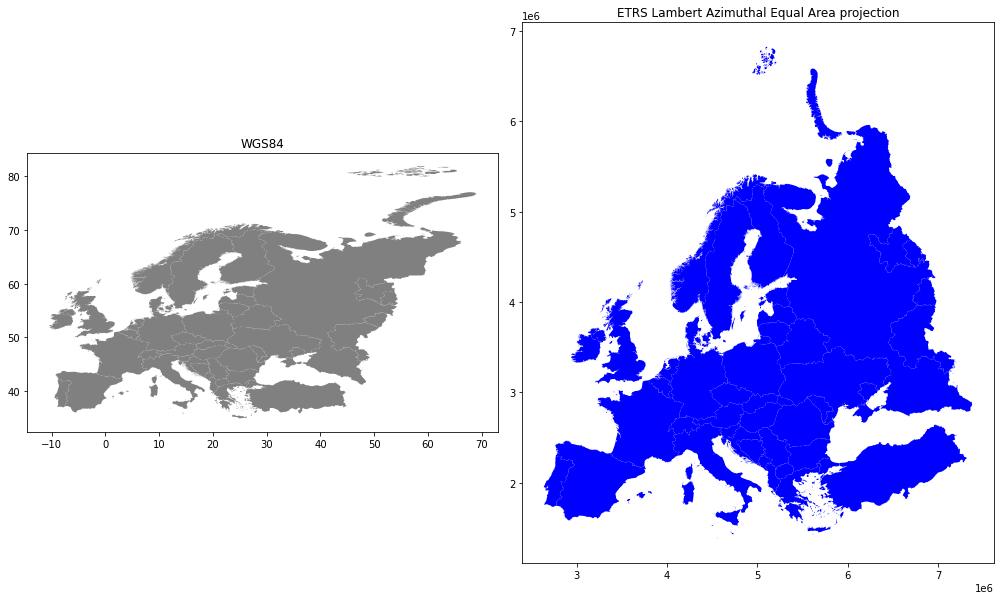

In [7]:
import matplotlib.pyplot as plt


# подготовим бланки
fig , (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,12))
# визуализация данных в проекции WGS84
ax1.set_title("WGS84")
data_WGS84.plot(ax=ax1, facecolor="grey")

# визуализация данных в проекции "ETRS Lambert Azimuthal Equal Area projection"
ax2.set_title("ETRS Lambert Azimuthal Equal Area projection")
data.plot(ax=ax2, facecolor="blue")

# Set aspect ratio as 1
ax1.set_aspect(aspect=1)
ax2.set_aspect(aspect=1)

# Удалите пустое пространство вокруг участка
plt.tight_layout()


##### Действительно, карты выглядят совсем по-другому, и перепроектированная карта выглядит гораздо лучше в Европе, поскольку области, особенно на севере, более реалистичны и не так растянуты, как в WGS84.

Cохраним наш проецируемый слой в Шейп-файл, чтобы использовать его позже. Обратите внимание, даже если информация crs хранится в .prj-файл, возможно, было бы неплохо также включить информацию crs в имя файла:

In [8]:
# путь для выгрузки
outfp = os.path.join(ROOT_PATH, r"L2_data\Europe_borders_epsg3035.shp")
    
# сохранение
data.to_file(outfp)

#### Работа с различными форматами CRS
Существуют различные способы представления информации о координатной системе отсчета, такие как [PROJ strings](https://proj.org/usage/quickstart.html), `EPSG codes, Well-Known-Text (WKT), JSON`. Вполне вероятно, что вы столкнетесь с некоторыми из них при работе с пространственными данными, полученными из разных источников. Возможность конвертировать информацию CRS из одного формата в другой необходима время от времени, поэтому полезно знать несколько трюков, как это сделать.

К счастью, работа с информацией CRS проста в Python с помощью [pyproj](https://pyproj4.github.io/pyproj/stable/). На самом деле, pyproj является ли оболочка Python вокруг программного обеспечения под названием [PROJ](https://proj.org/) (поддерживается компанией [OSGeo community](https://www.osgeo.org/)), который широко используется для проведения преобразований координат в различных ГИС-программах. `Pyproj` он также используется под капотом в GeoPandas и обрабатывает все определения CRS и преобразования координат (перепроектирование из CRS в другую, как мы делали ранее).



##### Общие сведения
Следующая ячейка кода выводит сводную информацию о различных способах представления информации crs с помощью PYPROJ CRS. Здесь мы используем crs исходного слоя европейских границ в качестве отправной точки:

In [9]:
# импорт класса CRS
from pyproj import CRS

In [10]:
# словарь CRS
crs_dict = data_WGS84.crs
crs_dict

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
# pyproj crs объект
crs_object = CRS(data_WGS84.crs)
crs_object

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
# Код EPSG код (здесь, на входе СМО информация является немного расплывчатым, так что нам надо понизить порог доверия)
crs_epsg = CRS(data_WGS84.crs).to_epsg(min_confidence=25)
crs_epsg

4326

In [13]:
# PROJ строка
crs_proj4 = CRS(data_WGS84.crs).to_proj4()
crs_proj4

E:\Anaconda3\envs\python-gis\lib\site-packages\ipykernel_launcher.py:2: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  


'+proj=longlat +datum=WGS84 +no_defs +type=crs'

In [14]:
# Well-Known Text (WKT)
crs_wkt = CRS(data_WGS84.crs).to_wkt()
crs_wkt

'GEOGCRS["WGS 84",DATUM["World Geodetic System 1984",ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],CS[ellipsoidal,2],AXIS["geodetic latitude (Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433]],AXIS["geodetic longitude (Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433]],USAGE[SCOPE["unknown"],AREA["World"],BBOX[-90,-180,90,180]],ID["EPSG",4326]]'

### Объект Pyproj CRS
pyproj - библиотека имеет [класс](https://docs.python.org/3/tutorial/classes.html) под названием [CRS](https://pyproj4.github.io/pyproj/dev/api/crs.html), который предоставляет множество полезных функций для работы с информацией CRS.

In [15]:
# Давайте посмотрим текущие CRS наших данных
print(data.crs)

epsg:3035


Печать crs с помощью оператора print () дает нам код EPSG.
Однако давайте посмотрим, как эта же информация выглядит в других форматах, таких как WKT или Proj4 текст. Для этого нам нужно использовать CRS класс.

In [16]:
# Инициализируйте класс CRS для кода epsg 3035:
crs_object = CRS.from_epsg(3035)
crs_object

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - LCC & LAEA
- bounds: (-35.58, 24.6, 44.83, 84.17)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Как мы видим, CRSобъект содержит информацию о системе координат, такой как NameCRS (ETRS89 / LAEA Europe), areaгде используется CRS (Europe with bounds (-16.1, 32.88, 40.18, 84.17)), и Datum(Европейская наземная система отсчета 1989 года).

Мы также можем легко разобрать эту информацию по отдельности следующим образом:

In [17]:
# Имя
print("имя:", crs_object.name)

# система координат
print("система координат:", crs_object.coordinate_system)

# границы области , в которой используется CRS
print("Bounds:", crs_object.area_of_use.bounds)

имя: ETRS89-extended / LAEA Europe
система координат: cartesian
Bounds: (-35.58, 24.6, 44.83, 84.17)


Вы можете изучить всю возможную информацию, которую можно извлечь из CRS, набрав текст crs_object. и нажимает табулятор.

Давайте посмотрим, как мы можем конвертировать информацию crs из одного формата в другой. Довольно часто полезно знать код EPSG CRS. Далее мы проведем несколько трансформаций, чтобы продемонстрировать возможности CRS класс.

In [18]:
# CRS информация WKT формата
crs_wkt = crs_object.to_wkt()
print(crs_wkt)

PROJCRS["ETRS89-extended / LAEA Europe",BASEGEOGCRS["ETRS89",DATUM["European Terrestrial Reference System 1989",ELLIPSOID["GRS 1980",6378137,298.257222101,LENGTHUNIT["metre",1]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",4258]],CONVERSION["Europe Equal Area 2001",METHOD["Lambert Azimuthal Equal Area",ID["EPSG",9820]],PARAMETER["Latitude of natural origin",52,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8801]],PARAMETER["Longitude of natural origin",10,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["False easting",4321000,LENGTHUNIT["metre",1],ID["EPSG",8806]],PARAMETER["False northing",3210000,LENGTHUNIT["metre",1],ID["EPSG",8807]]],CS[Cartesian,2],AXIS["northing (Y)",north,ORDER[1],LENGTHUNIT["metre",1]],AXIS["easting (X)",east,ORDER[2],LENGTHUNIT["metre",1]],USAGE[SCOPE["unknown"],AREA["Europe - LCC & LAEA"],BBOX[24.6,-35.58,84.17,44.83]],ID["EPSG",3035]]


Как видим, WKT формат содержит очень много информации. Обычно, например .prj, файл Шейп-файла содержит информацию в этом формате. Давайте посмотрим, как из этого можно извлечь EPSG код. Для этого нам нужно повторно инициализировать объект CRS, на этот раз из WKT текстового представления.

In [19]:
# Retrieve EPSG code from WKT text
epsg = CRS(crs_wkt).to_epsg()
print(epsg)

3035


Не в состоянии распознать epsg?

Иногда to_epsg()не может распознать код EPSG из представления WKT. Это может произойти, если в информации WKT отсутствуют некоторые детали. К счастью, мы можем легко настроить минимальный уровень доверия для сопоставления информации CRS и кода EPSG. Мы можем сделать это, настроив параметр min_confidenceпри вызове функции. По умолчанию уровень доверия равен 70 %, но также можно установить более низкий порог доверия.

Координатная информация нашего входного шейп-файла является неполной и не дает значения epsg с настройкой по умолчанию: однако CRS может определить значение EPSG с более низким доверительным порогом:

##### Давайте попробуем извлечь код EPSG из crs наших исходных данных:
CRS(data.crs).to_epsg()
> None
    
##### давайте попробуем еще раз с более низким требованием доверия (25 %)
CRS(data.crs).to_epsg(min_confidence=25)
> 3035
Однако будьте осторожны при использовании этого метода, так как угадывание EPSG из “экзотических” систем координат также может привести к ложным результатам.

##### Давайте теперь сохраним наши данные на диск с помощью WKT форматируйте как crs нашего GeoDataFrame. WKT - это предпочтительный формат вывода при хранении информации crs в виде текста.

In [20]:
# Переопределим CRS для входного GeoDataFrame 
data.crs = CRS.from_epsg(3035).to_wkt()
print(data.crs)

PROJCRS["ETRS89-extended / LAEA Europe",BASEGEOGCRS["ETRS89",DATUM["European Terrestrial Reference System 1989",ELLIPSOID["GRS 1980",6378137,298.257222101,LENGTHUNIT["metre",1]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",4258]],CONVERSION["Europe Equal Area 2001",METHOD["Lambert Azimuthal Equal Area",ID["EPSG",9820]],PARAMETER["Latitude of natural origin",52,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8801]],PARAMETER["Longitude of natural origin",10,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["False easting",4321000,LENGTHUNIT["metre",1],ID["EPSG",8806]],PARAMETER["False northing",3210000,LENGTHUNIT["metre",1],ID["EPSG",8807]]],CS[Cartesian,2],AXIS["northing (Y)",north,ORDER[1],LENGTHUNIT["metre",1]],AXIS["easting (X)",east,ORDER[2],LENGTHUNIT["metre",1]],USAGE[SCOPE["unknown"],AREA["Europe - LCC & LAEA"],BBOX[24.6,-35.58,84.17,44.83]],ID["EPSG",3035]]


In [21]:
# путь для выгрузки
outfp = os.path.join(ROOT_PATH, r"L2_data\Europe_borders_wkt.shp")
    
# сохранение
data.to_file(outfp)

### **ПОДСКАЗКА:** Модуль называется PyCRS он содержит информацию и поддерживает множество различных определений координат, таких как OGC WKT (v1), ESRI WKT, Proj4, а также любой код EPSG, ESRI или SR-ORG, доступный из spatialreference.org.

### Глобальные картографические проекции
Наконец, давайте поиграем с глобальными картографическими проекциями :) L2_data папка conaints слой ne_110m_admin_0_countries.shp это представляет собой границы стран мира. Данные были загружены из fownloaded https://www.naturalearthdata.com/.

##### Задача
Читайте в глобальном наборе данных и постройте три карты с разными проекциями! См. подсказки и определения проекций из:

http://geopandas.org/projections.html

https://pyproj4.github.io/pyproj/dev/api/crs.html

https://spatialreference.org/

При построении карт необходимо учитывать преимущества и недостатки различных проекций карт мира.

In [22]:
# Чтение в данных
fp = os.path.join(ROOT_PATH, r"L2_data\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp")

# Чтение
admin = gpd.read_file(fp)
admin.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,서사하라,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,캐나다,Canada,Kanada,Canadá,Канада,Kanada,Kanada,Canada,加拿大,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [23]:
# проверим CRS
admin.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
# Установите размер фигуры
plt.rcParams['figure.figsize'] = [12, 6]

Text(0.5, 1.0, 'WGS84')

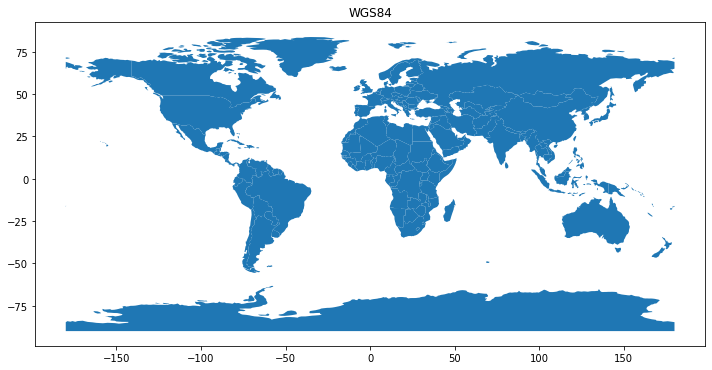

In [29]:
# визуализируем в оригинальной проекции
ax = admin.plot()
ax.set_title("WGS84")

(-22041259.177068166,
 22041259.177068174,
 -22763311.394043904,
 20402065.480312254)

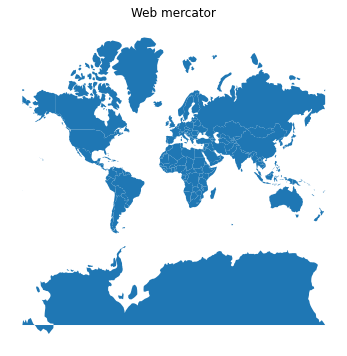

In [30]:
# Определим проекцию, как web mercator, 3785
web_mercator = CRS.from_epsg(3785)

# перепроецируем и визуализируем
ax = admin.to_crs(web_mercator).plot()
ax.set_title("Web mercator")

# удалим оси
plt.axis('off')

(-18321736.696081996,
 18321736.696081992,
 -9302420.503183275,
 9217598.414473996)

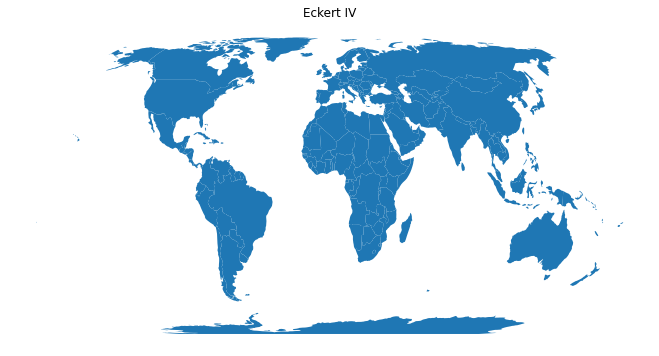

In [31]:
# Определить проекцию Эккерта IV из https://spatialreference.org/ref/esri/54012/
eckert_IV = CRS.from_proj4("+proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

# перепроецируем и визуализируем
ax = admin.to_crs(eckert_IV).plot()
ax.set_title("Eckert IV")

# удалим оси
plt.axis('off')

(-6973920.630502565, 6644356.577496429, -6996028.663660021, 6980341.297325061)

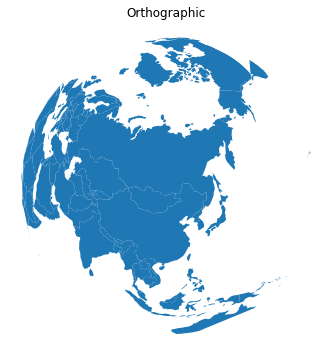

In [33]:
# Определите орфографическую проекцию с центром в ЧИТЕ! : http://www.statsmapsnpix.com/2019/09/globe-projections-and-insets-in-qgis.html
ortho = CRS.from_proj4("+proj=ortho + lat_0=53.00 +lon_0=113.0000 +x_0=0 +y_0=0 +a=6370997 +b=6370997 + units=m +no_defs")

# перепроецируем и визуализируем
ax = admin.to_crs(ortho).plot()
ax.set_title("Orthographic")

# удалим оси
plt.axis('off')
